In [1]:
# GET PARAMETERS
import os 
import sys
# Get Parent folder : 
current_path = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_path, '..'))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

from examples.train_model_on_k_fold_validation import load_configuration
from examples.train_and_visu_non_recurrent import get_ds

Training and Hyper-parameter tuning with Ray is not possible


In [2]:
#trial_id ='subway_in_STGCN_MSELoss_2025_01_06_08_00_94523'
trial_id ='subway_in_subway_out_STGCN_VariableSelectionNetwork_MSELoss_2025_01_06_02_04_17963'
args,_ = load_configuration(trial_id,load_config=True,epochs=None)


station = ['BEL','PAR','PER','FLA']   # 'BON'  #'GER'
training_mode_to_visualise = ['test']#,'valid','train']
modification ={'keep_best_weights':True,
                'epochs':1,
                'validation_split_method' : 'forward_chaining_cv',
                'min_fold_size_proportion': 0.75,
                'train_prop':0.6,
                'valid_prop':0.2,
                'test_prop':0.2,

                'set_spatial_units':['BEL','PER','PAR','GER','CHA'],
        
                'data_augmentation': True, #True,  #False
                'DA_method':'noise', # 'noise' # 'interpolation
                'DA_moment_to_focus' : None, #[{'hours':[0,23],'weekdays':[1,3]}], # None
                'DA_min_count': 5,
                'DA_alpha' : 1,
                'DA_prop' : 0.1, # 1 #0.005
                'DA_noise_from': 'MSTL' # 'MSTL' # 'Homogenous'
                }
ds,args_modif,trial_id,save_folder,df_loss = get_ds(args.model_name,args.dataset_names,args.dataset_for_coverage,
                                              modification=modification,args_init=args,fold_to_evaluate=[args.K_fold-1])


>>>> Load best CONFIG


Considered Spatial-Unit:  ['BEL', 'PER', 'PAR', 'GER', 'CHA']

Init Dataset: 'torch.Size([7392, 5]) with 36960 Total nb of elements and 0 Nan values
Considered Spatial-Unit:  ['BEL', 'PER', 'PAR', 'GER', 'CHA']
vision_input_type POIs
vision_model_name VariableSelectionNetwork
2821 train samples had been added thank to Data Augmentation
calendar_dayofweek data augmented by dupplication but not modified
calendar_hour data augmented by dupplication but not modified
Train/Target size:  torch.Size([5642, 5, 7]) torch.Size([5642, 5, 1])
contextual_train_augmented size:  [torch.Size([5642, 7]), torch.Size([5642, 18]), torch.Size([5642, 5, 7]), torch.Size([5642, 5, 7]), torch.Size([5642, 5, 7]), torch.Size([5642, 5, 7]), torch.Size([5642, 5, 7])]
Init U/Utarget size: torch.Size([4702, 5, 7])/torch.Size([4702, 5, 1]) Train/Valid/Test 5642 940 940

 ===== ERROR ==== 
Try with torch >= 2.0.0 (works with 2.0.1) to allow 'prefetch_factor' 
ValueError: prefetch_factor option could only be specified 

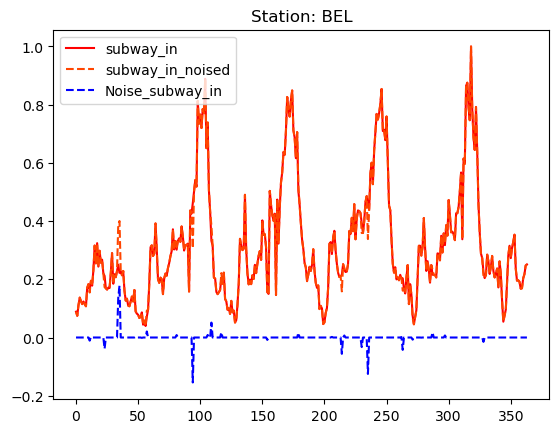

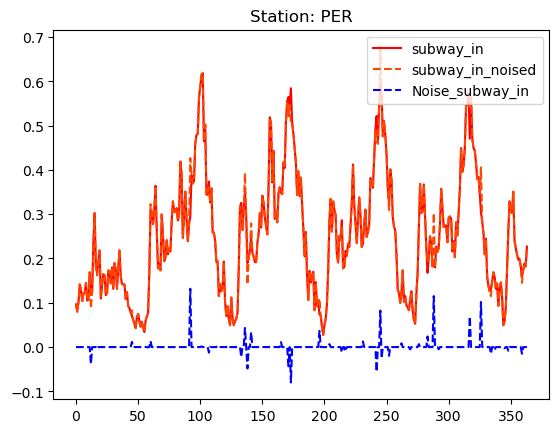

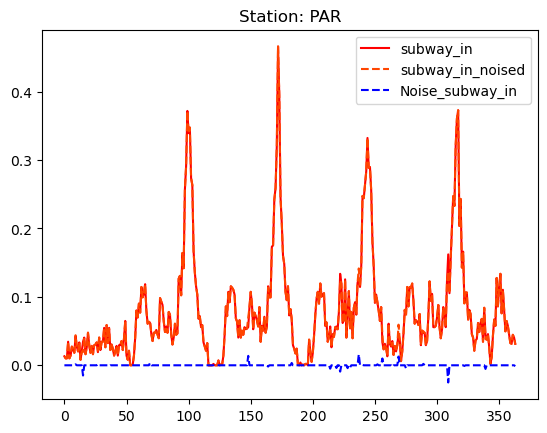

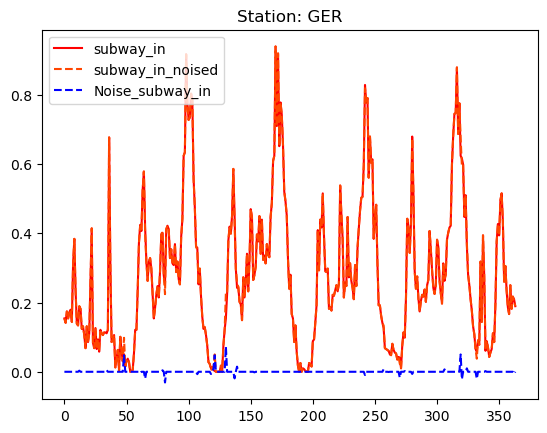

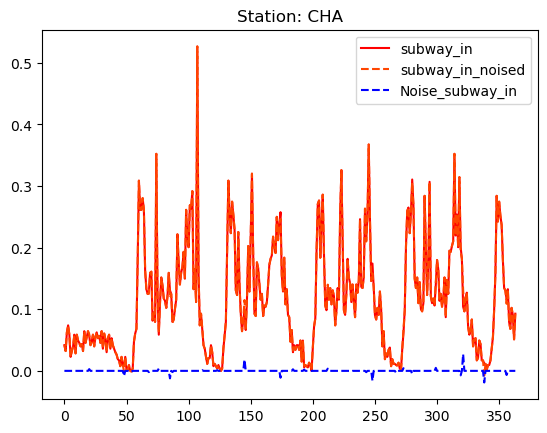

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

last_ind = ds.U_train.size(0)//2
k=20
nb_days = 4


for i,spatial_unit in enumerate(ds.spatial_unit):
    subway_in_data = ds.U_train[k:96*nb_days,i,-1]
    noised_subway_in = ds.U_train[k+last_ind:last_ind+ 96*nb_days,i,-1]
    Noise_subway_in=   noised_subway_in - subway_in_data
    #Noise_subway_out=ds.contextual_train[f'subway_out_{spatial_unit}'][k:96*nb_days,i,-1]-ds.contextual_train[f'subway_out_{spatial_unit}'][k+last_ind:last_ind+ 96*nb_days,0,-1]
    df = pd.DataFrame(dict(subway_in= subway_in_data,
                           subway_in_noised = noised_subway_in,
                            Noise_subway_in=Noise_subway_in,
                    ))
    color = ['red','orangered','blue']
    style = ['-','--','--']

    if modification['DA_alpha'] != 1:
        df[f"Noise_subway_in_alpha{modification['DA_alpha']}"] = Noise_subway_in/modification['DA_alpha']
        style.append('--')
        color.append('lightblue')

    df.plot(color=color,style=style)
    plt.title(f"Station: {spatial_unit}")